In [4]:
#https://machinelearningmastery.com/feature-selection-machine-learning-python/

# 1. Univariate Selection

In [5]:
import numpy as np 

np.set_printoptions(precision=5) 


In [6]:
# Feature Selection with Univariate Statistical Tests
from pandas import read_csv
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

# load data
filename = 'pima-indians-diabetes.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]

# feature extraction
test = SelectKBest(score_func=f_classif, k=4)
fit = test.fit(X, Y)

# summarize scores
set_printoptions(precision=3)
print(fit.scores_)

features = fit.transform(X)
# summarize selected features
print(features[0:5,:])

[ 39.67  213.162   3.257   4.304  13.281  71.772  23.871  46.141]
[[  6.  148.   33.6  50. ]
 [  1.   85.   26.6  31. ]
 [  8.  183.   23.3  32. ]
 [  1.   89.   28.1  21. ]
 [  0.  137.   43.1  33. ]]


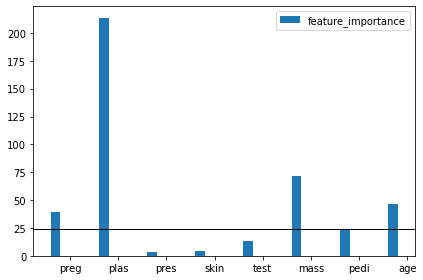

In [7]:
import matplotlib.pyplot as plt
import numpy as np


labels = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age']
compoents0  =fit.scores_

x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots()
rects0 = ax.bar(x - 1.5*width, compoents0, width, label='feature_importance')

threshold = compoents0[6]
plt.axhline(y=threshold,linewidth=1, color='k')

plt.xticks(x, labels)

ax.legend()
fig.tight_layout()

plt.show()

In [8]:
#You can see the scores for each attribute and the 4 attributes chosen (those with the highest scores). 
#Specifically features with indexes 0 (preq), 1 (plas), 5 (mass), and 7 (age).

# 2. Recursive Feature Elimination

In [10]:
# Feature Extraction with RFE
from pandas import read_csv
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# load data
url = "pima-indians-diabetes.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(url, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]

# feature extraction
model = LogisticRegression(solver='lbfgs')
rfe = RFE(model, 3)
fit = rfe.fit(X, Y)

print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

Num Features: 3
Selected Features: [ True False False False False  True  True False]
Feature Ranking: [1 2 4 5 6 1 1 3]


C:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:937: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# 3. Principal Component Analysis

In [13]:
# Feature Extraction with PCA
import numpy
from pandas import read_csv
from sklearn.decomposition import PCA

# load data
url = "pima-indians-diabetes.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(url, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]

# feature extraction
pca = PCA(n_components=3)
fit = pca.fit(X)

# summarize components
print("Explained Variance: %s" % fit.explained_variance_ratio_)


import numpy as np
np.set_printoptions(precision=5, suppress=True)
print(fit.components_)


Explained Variance: [0.88855 0.06159 0.02579]
[[-0.00202  0.09781  0.01609  0.06076  0.99311  0.01401  0.00054 -0.00356]
 [-0.02265 -0.97221 -0.14191  0.05786  0.09463 -0.04697 -0.00082 -0.14017]
 [-0.02246  0.14343 -0.92247 -0.30701  0.02098 -0.13244 -0.00064 -0.12545]]


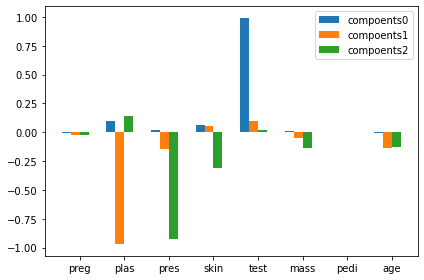

In [14]:
import matplotlib.pyplot as plt
import numpy as np


labels = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age']
compoents0  =fit.components_[0]
compoents1  =fit.components_[1]
compoents2  =fit.components_[2]

x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots()
rects0 = ax.bar(x - 1.5*width, compoents0, width, label='compoents0')
rects1 = ax.bar(x - 0.5*width, compoents1, width, label='compoents1')
rects2 = ax.bar(x + 0.5*width, compoents2, width, label='compoents2')
plt.xticks(x, labels)

ax.legend()
fig.tight_layout()

plt.show()

# 4. Feature Importance

In [16]:
# Feature Importance with Extra Trees Classifier
from pandas import read_csv
from sklearn.ensemble import ExtraTreesClassifier

# load data
url = "pima-indians-diabetes.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(url, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]

# feature extraction
model = ExtraTreesClassifier(n_estimators=10)
model.fit(X, Y)
print(model.feature_importances_)

[0.10257 0.22462 0.10413 0.07974 0.06849 0.13285 0.12757 0.16003]


In [17]:
#['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age']
#The scores suggest at the importance of plas, age and mass.

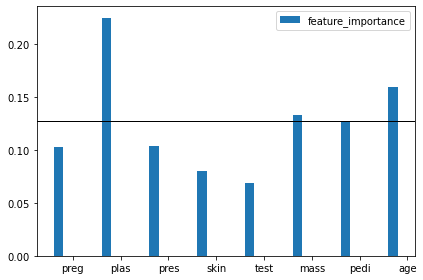

In [18]:
import matplotlib.pyplot as plt
import numpy as np


labels = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age']
compoents0  =model.feature_importances_

x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots()
rects0 = ax.bar(x - 1.5*width, compoents0, width, label='feature_importance')

threshold = compoents0[6]
plt.axhline(y=threshold,linewidth=1, color='k')

plt.xticks(x, labels)

ax.legend()
fig.tight_layout()

plt.show()